#Домашнее задание № 4. Модели авторегрессии условной гетероскедантичности.

##Загрузим необходимые данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

In [39]:
!pip install arch

In [41]:
from arch import arch_model

In [2]:
# загрузим данные
!wget 'https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._Лекция_tsml.zip'

--2025-02-25 16:47:30--  https://u.netology.ru/backend/uploads/lms/attachments/files/data/47497/1._%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_tsml.zip
Resolving u.netology.ru (u.netology.ru)... 213.180.193.247, 2a02:6b8::1da
Connecting to u.netology.ru (u.netology.ru)|213.180.193.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 769056 (751K) [application/x-zip-compressed]
Saving to: ‘1._Лекция_tsml.zip.8’

1._Лекция_tsml.zip. 100%[===================>] 751.03K   678KB/s    in 1.1s    

2025-02-25 16:47:32 (678 KB/s) - ‘1._Лекция_tsml.zip.8’ saved [769056/769056]



In [3]:
# распакуем
import zipfile

with zipfile.ZipFile('/content/1._Лекция_tsml.zip', 'r') as zip_ref:
    zip_ref.extractall('unpacked_files')

В качестве ряда для анализа выберу monthly_boston_armed_robberies_j. Он мне кажется самым интересным.

In [4]:
# 2. ежемесячные_бостонские вооруженные_ ограбления_j
monthly_boston_armed_robberies_j = pd.read_csv('/content/unpacked_files/Series/monthly-boston-armed-robberies-j.csv')

In [5]:
series = monthly_boston_armed_robberies_j['Count']

In [6]:
# вывод графиков
def chart_2(series_1, series_2=None, title=None):
    plt.figure(figsize=(14, 7))
    plt.plot(series_1, label='Временной ряд')
    if series_2 is not None:
        plt.plot(series_2, label=title)
    plt.title('Визуальное сравнение полученного временного ряда')
    plt.xlabel('Время')
    plt.ylabel('Величина')
    plt.grid(False)
    plt.legend()
    plt.show()

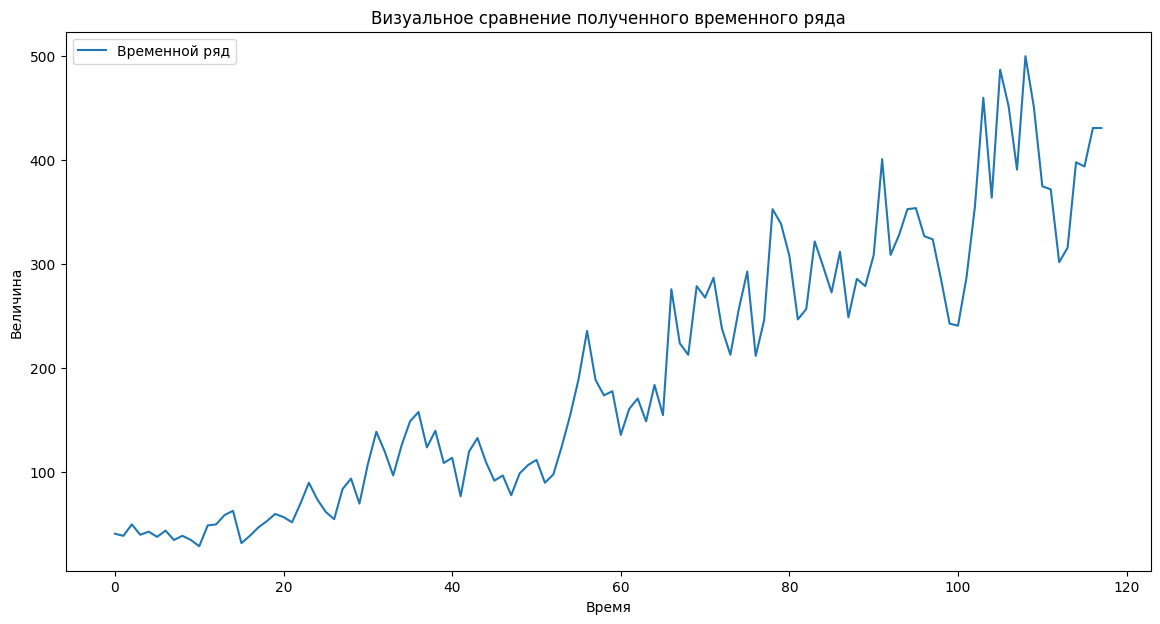

In [7]:
# еще раз на него посмотрим
chart_2(series)

Скопирую функции для анализа ряда

In [8]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [9]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)

        plt.tight_layout()
    return

##Модель GARCH

##Вариант 1.

---



In [10]:
# загрузим библиотеки
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [55]:
def _get_best_model(TS):
    # отключаем сообщения об ошибках
    import warnings
    warnings.filterwarnings('ignore')

    # для поиска наилучших параметров воспользуемся поиском по сетке
    p = range(0,5)
    d = q = range(0,3)
    pdq = list(itertools.product(p, d, q))
    print(f'Всего рассмотрим {len(pdq)} вариантов')
    best_pdq = (0,0,0)

    # для поиска лучшей модели воспользуемся информационным критерием aic.
    # AIC — Akaike Information Criterion). AIC оценивает, насколько хорошо модель подходит под данные.
    # чем меньше AIC – тем точнее модель
    best_aic = np.inf

    for params in pdq:
        model_test = ARIMA(series, order=params)
        result_test = model_test.fit()

        if result_test.aic < best_aic:
            best_pdq = params
            best_aic = result_test.aic
            best_mod = result_test
    print(best_pdq, best_aic)

    return best_pdq, best_aic, best_mod

In [33]:
# отключаем сообщения об ошибках
import warnings
warnings.filterwarnings('ignore')

# для поиска наилучших параметров воспользуемся поиском по сетке
p = range(0,5)
d = q = range(0,3)
pdq = list(itertools.product(p, d, q))
print(f'Всего рассмотрим {len(pdq)} вариантов')
best_pdq = (0,0,0)

# для поиска лучшей модели воспользуемся информационным критерием aic.
# AIC — Akaike Information Criterion). AIC оценивает, насколько хорошо модель подходит под данные.
# чем меньше AIC – тем точнее модель
best_aic = np.inf

for params in pdq:
    model_test = ARIMA(series, order=params)
    result_test = model_test.fit()

    if result_test.aic < best_aic:
        best_pdq = params
        best_aic = result_test.aic
        result = result_test
print(best_pdq, best_aic)

Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356


Results of Dickey-Fuller Test:
Test Statistic                -7.020377e+00
p-value                        6.566831e-10
#Lags Used                     9.000000e+00
Number of Observations Used    1.080000e+02
Critical Value (1%)           -3.492401e+00
Critical Value (5%)           -2.888697e+00
Critical Value (10%)          -2.581255e+00
dtype: float64


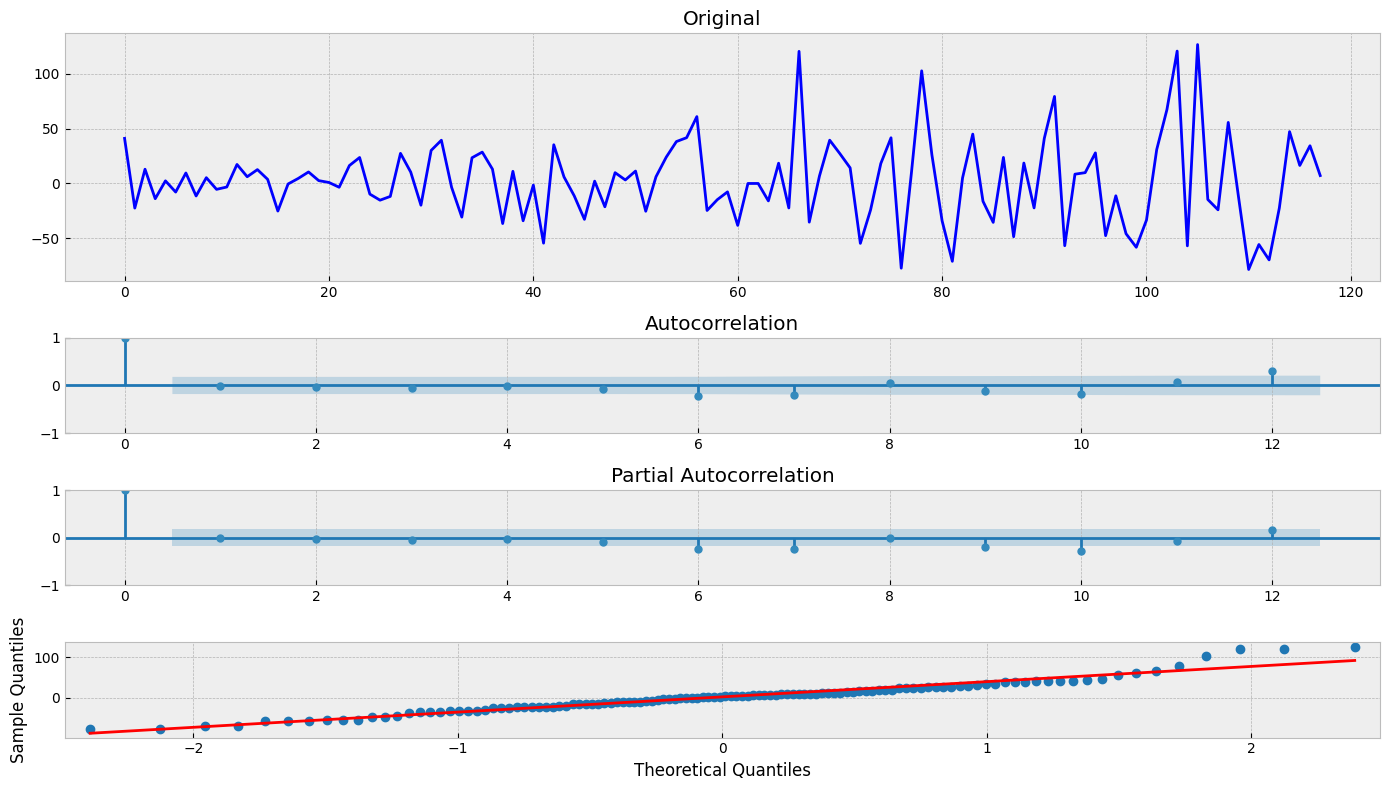

In [44]:
tsplot(result.resid, lags=12)

Results of Dickey-Fuller Test:
Test Statistic                  -5.320609
p-value                          0.000005
#Lags Used                       1.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


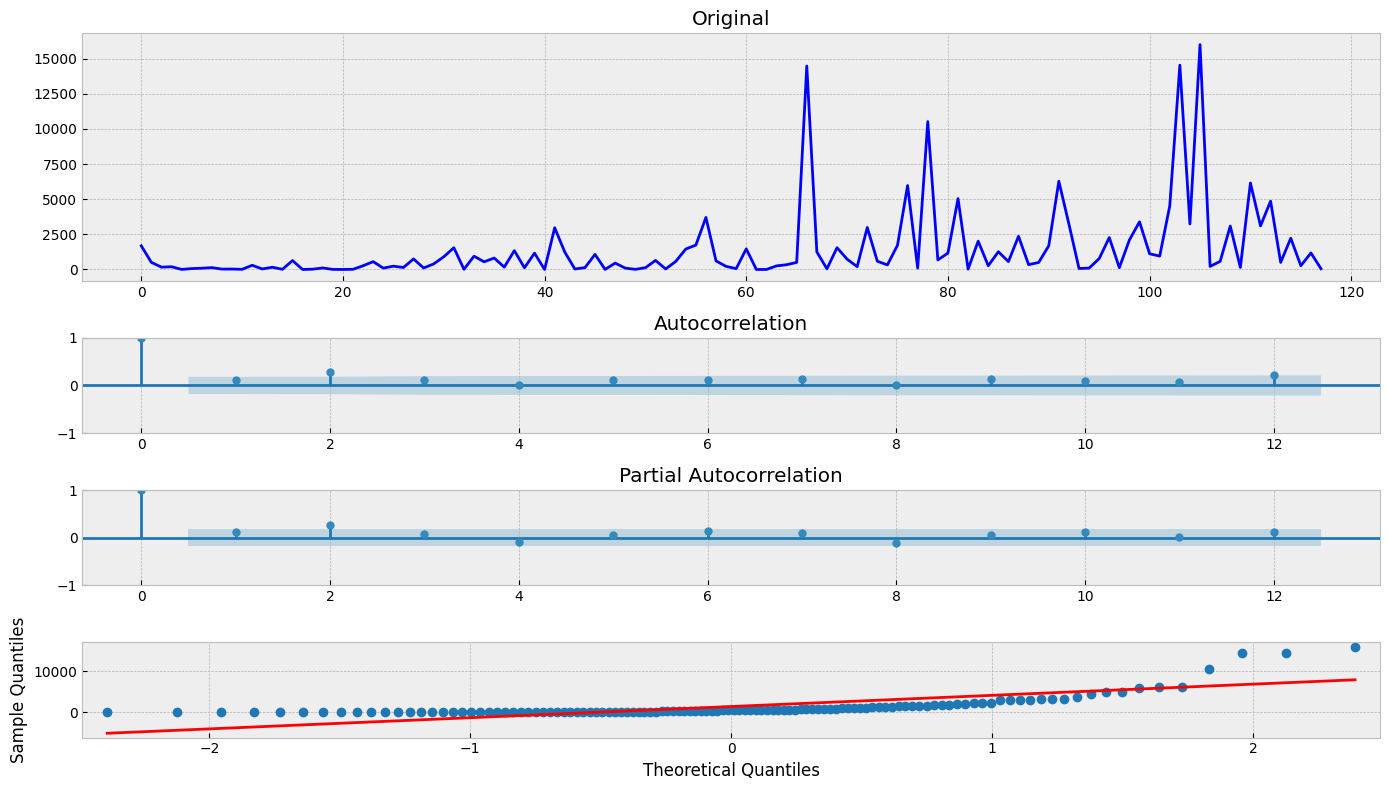

In [43]:
tsplot(result.resid**2, lags=12)

In [42]:
p_ = best_pdq[0]
o_ = best_pdq[1]
q_ = best_pdq[2]

am = arch_model(result.resid, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -578.670
Distribution:      Standardized Student's t   AIC:                           1177.34
Method:                  Maximum Likelihood   BIC:                           1205.05
                                              No. Observations:                  118
Date:                      Tue, Feb 25 2025   Df Residuals:                      117
Time:                              17:07:48   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2

Results of Dickey-Fuller Test:
Test Statistic                -7.020377e+00
p-value                        6.566831e-10
#Lags Used                     9.000000e+00
Number of Observations Used    1.080000e+02
Critical Value (1%)           -3.492401e+00
Critical Value (5%)           -2.888697e+00
Critical Value (10%)          -2.581255e+00
dtype: float64


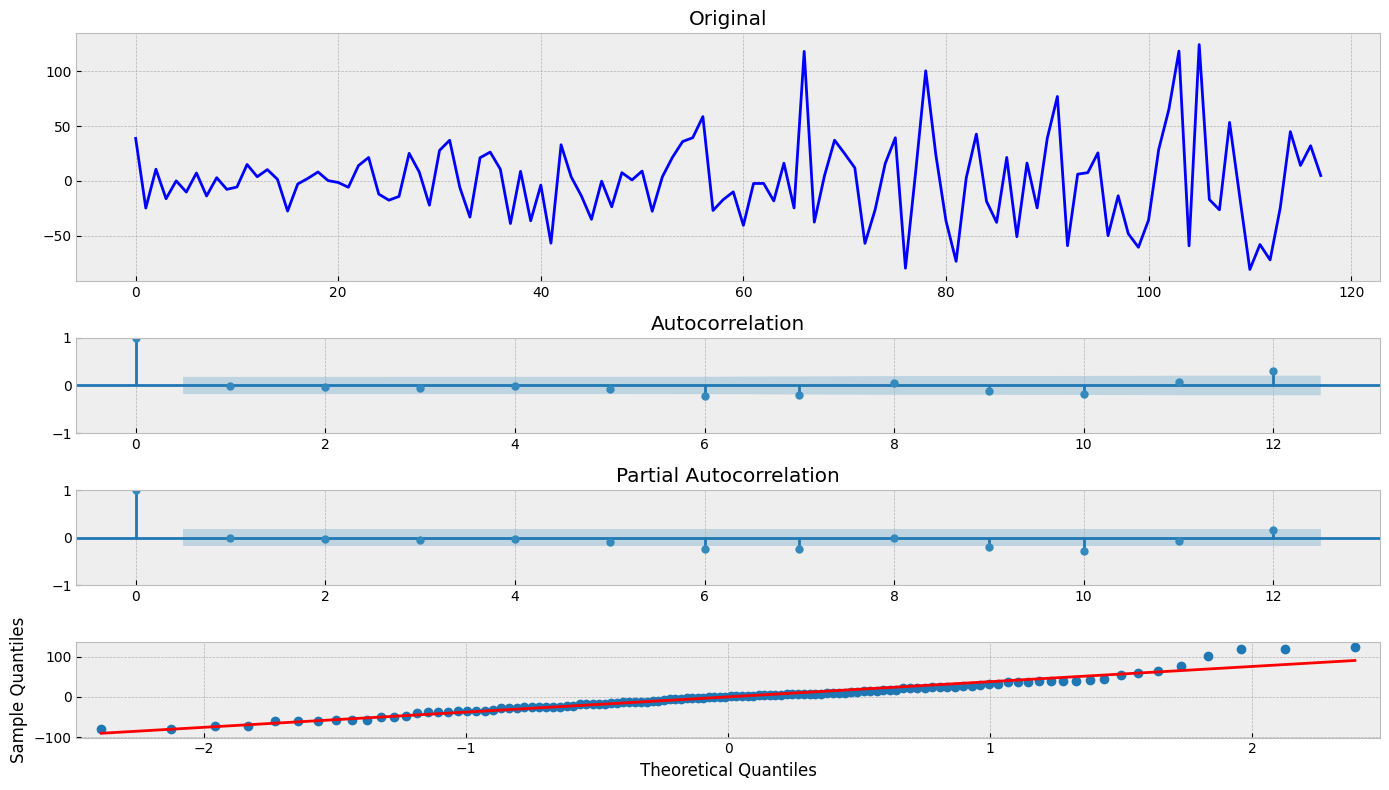

In [45]:
tsplot(res.resid, lags=12)

Results of Dickey-Fuller Test:
Test Statistic                  -5.288916
p-value                          0.000006
#Lags Used                       1.000000
Number of Observations Used    116.000000
Critical Value (1%)             -3.488022
Critical Value (5%)             -2.886797
Critical Value (10%)            -2.580241
dtype: float64


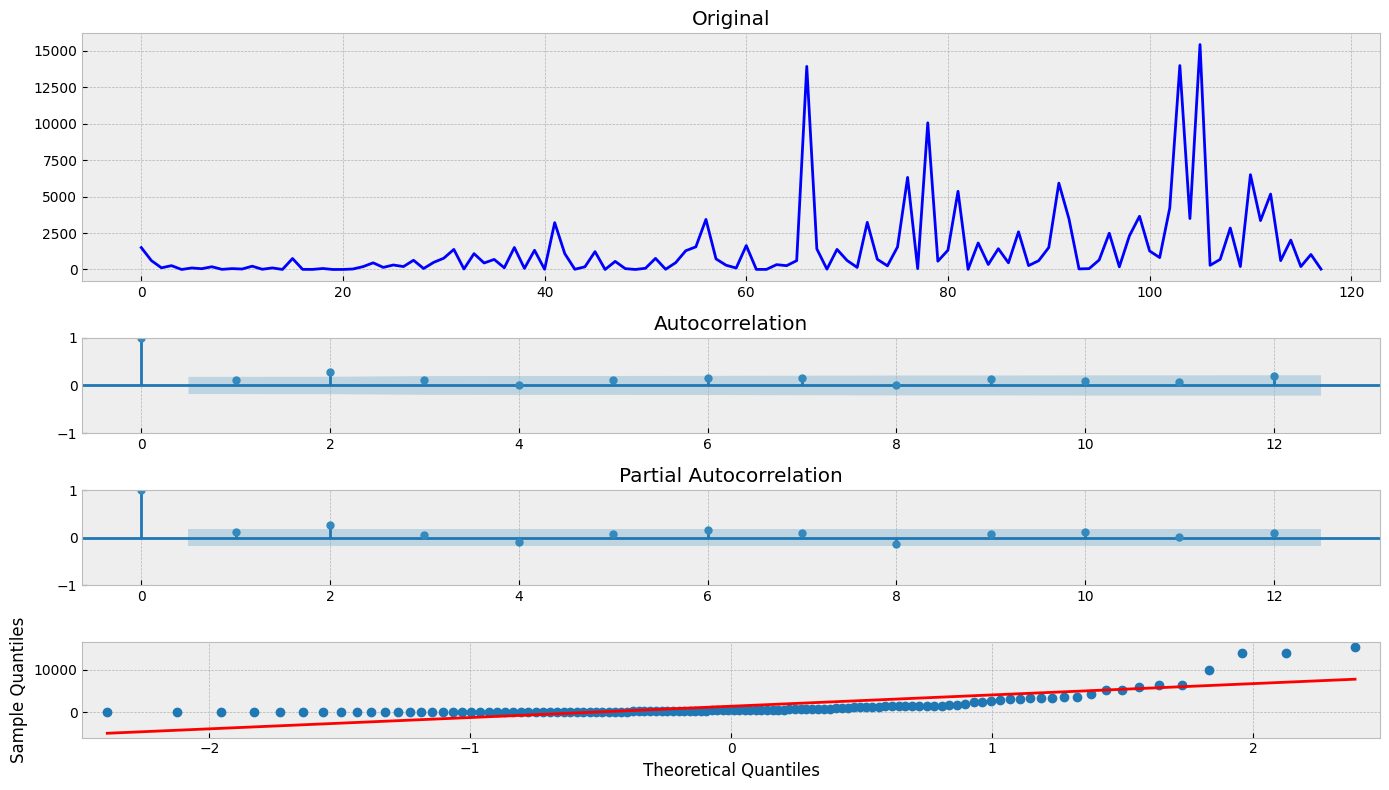

In [46]:
tsplot(res.resid**2, lags=12)

In [47]:
windowLength = 12

In [48]:
foreLength = len(series) - windowLength
signal = 0*series[-foreLength:]

In [ ]:
for d in range(foreLength):

    # create a rolling window by selecting
    # values between d+1 and d+T of S&P500 returns

    TS = series[(1+d):(windowLength+d)]

    # найдем лучшие параметры ARIMA
    res_tup = _get_best_model(TS)
    order = res_tup[1]
    model = res_tup[2]

    # передаем ARIMA fit в GARCH model
    p_ = best_pdq[0]
    o_ = best_pdq[1]
    q_ = best_pdq[2]

    am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
    res = am.fit(update_freq=5, disp='off')

    # генерируем прогноз на следующий день
    out = res.forecast(horizon=1, start=None, align='origin')

Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.2387907110356
Всего рассмотрим 45 вариантов
(4, 2, 1) 1189.23879071103